Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [3]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [8]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Test')

In [9]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [13]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

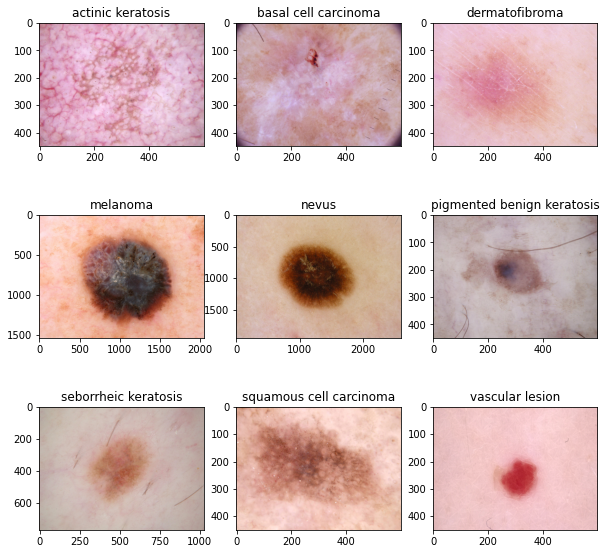

In [14]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
    plt.subplot(3, 3, i + 1)
    image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
    plt.title(class_names[i])
    plt.imshow(image)
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [16]:
### Your code goes here
from keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPool2D
num_classes = 9
model = Sequential(
    [layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))]
)
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [17]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

### Train the model

In [19]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 544s 243ms/step - loss: 2.0457 - accuracy: 0.2065 - val_loss: 2.3097 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 4s 71ms/step - loss: 2.0078 - accuracy: 0.2137 - val_loss: 2.3493 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 4s 72ms/step - loss: 1.8105 - accuracy: 0.3365 - val_loss: 2.1650 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 4s 71ms/step - loss: 1.8438 - accuracy: 0.3237 - val_loss: 2.4414 - val_accuracy: 0.2174
Epoch 5/20
56/56 [==============================] - 4s 71ms/step - loss: 1.7636 - accuracy: 0.3415 - val_loss: 2.7018 - val_accuracy: 0.0870
Epoch 6/20
56/56 [==============================] - 4s 71ms/step - loss: 1.6074 - accuracy: 0.4241 - val_loss: 2.5723 - val_accuracy: 0.1304
Epoch 7/20
56/56 [==============================] - 4s 72ms/step - loss: 1.5911 - accuracy: 0.4319 - val_loss: 2.3212 - val_accuracy: 0.2609
Epoch 8/20
56/56 [===

### Visualizing training results

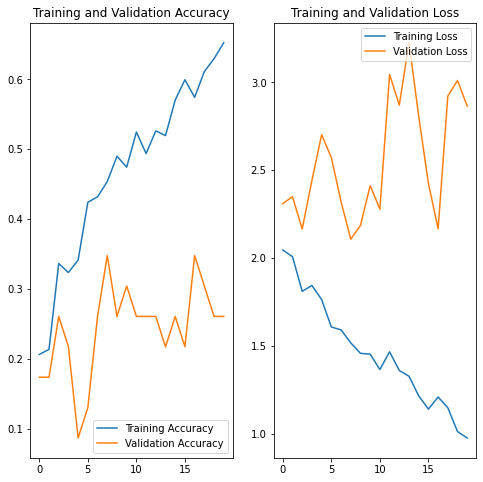

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation : 
1. The model is overfitting because we can also see difference in loss functions in training & test around the 10-11th epoch
2. The accuracy is just around 75-80% because there are enough features to remember the pattern.

In [21]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

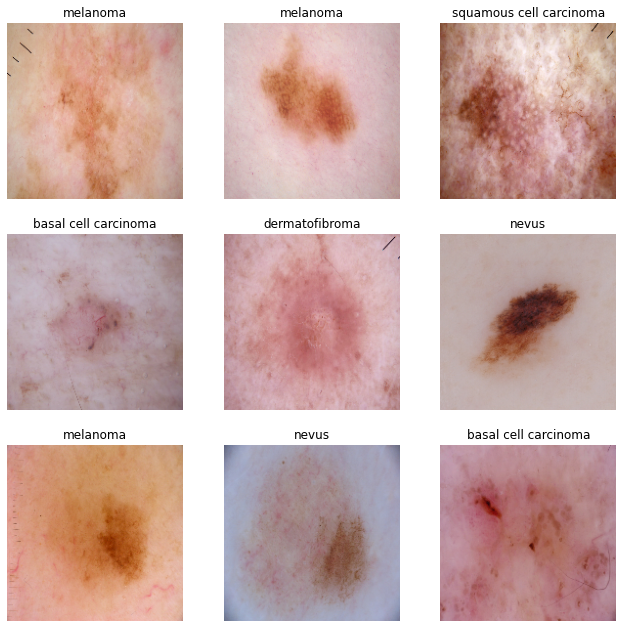

In [22]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(11, 11))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [23]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential(
    [ data_augument,layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))  ]
)

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))



### Compiling the model

In [24]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

### Training the model

In [25]:
## Your code goes here, note: train your model for 20 epochs

epochs=20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 7s 85ms/step - loss: 2.0677 - accuracy: 0.1925 - val_loss: 2.4596 - val_accuracy: 0.1739
Epoch 2/20
56/56 [==============================] - 5s 81ms/step - loss: 1.9073 - accuracy: 0.2729 - val_loss: 2.5780 - val_accuracy: 0.2174
Epoch 3/20
56/56 [==============================] - 5s 84ms/step - loss: 1.8201 - accuracy: 0.3170 - val_loss: 2.5269 - val_accuracy: 0.2609
Epoch 4/20
56/56 [==============================] - 4s 80ms/step - loss: 1.6767 - accuracy: 0.3996 - val_loss: 2.3787 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 4s 80ms/step - loss: 1.6554 - accuracy: 0.3912 - val_loss: 2.5511 - val_accuracy: 0.2174
Epoch 6/20
56/56 [==============================] - 5s 81ms/step - loss: 1.7737 - accuracy: 0.3415 - val_loss: 2.6474 - val_accuracy: 0.1739
Epoch 7/20
56/56 [==============================] - 5s 81ms/step - loss: 1.6181 - accuracy: 0.4035 - val_loss: 2.2393 - val_accuracy: 0.3043
Epoch 8/20
56

### Visualizing the results

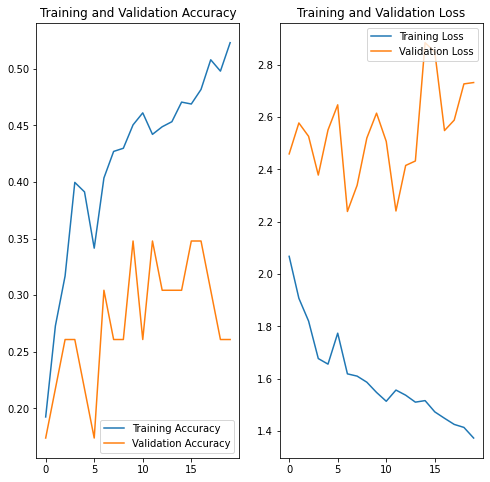

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observation : There is no improvement in accuracy but we can definitely see the overfitting problem has solved due to data augmentation.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

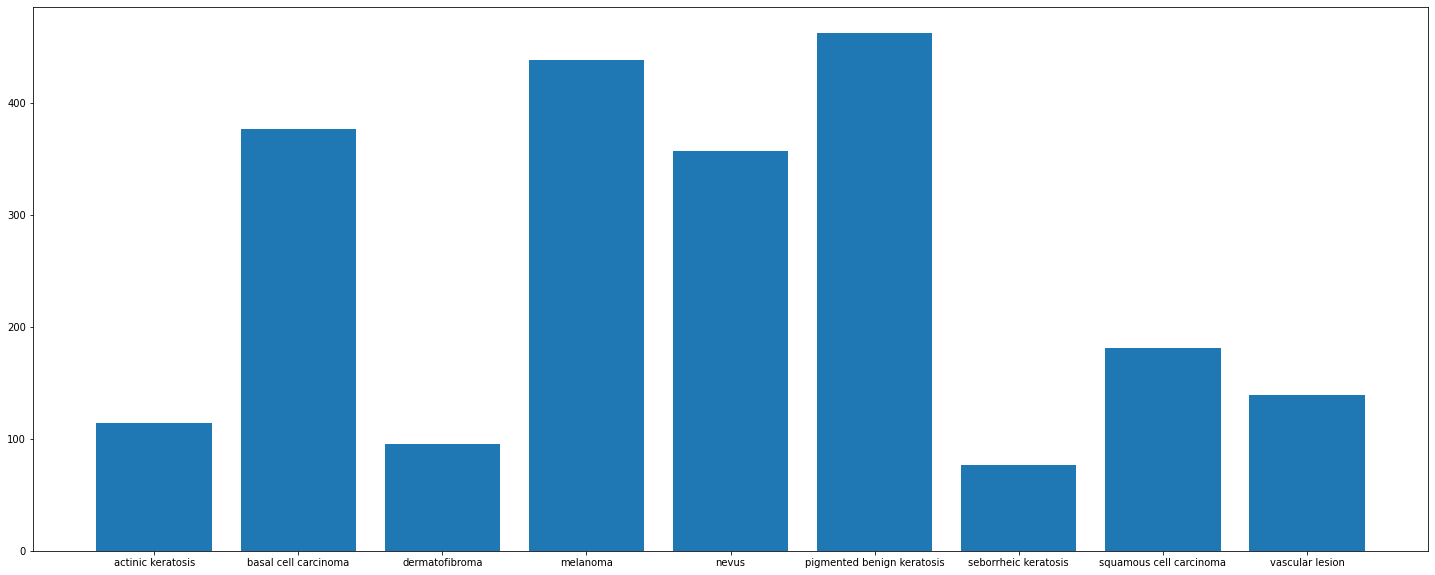

In [27]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### **Findings**  
#### - Which class has the least number of samples?
Seborrheic keratosis have least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
actinic keratosis and dermatofibroma have proportionate number of classes. melanoma and pigmented benign keratosis have proprtionate number of classe


#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
path_to_training_dataset="/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD988544C10>: 100%|██████████| 500/500 [00:19<00:00, 25.52 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD98C390E10>: 100%|██████████| 500/500 [00:19<00:00, 25.09 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD98D9FCE90>: 100%|██████████| 500/500 [00:20<00:00, 24.07 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD98DA07250>: 100%|██████████| 500/500 [01:38<00:00,  5.08 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD98C060A50>: 100%|██████████| 500/500 [01:30<00:00,  5.53 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD9884CBA10>: 100%|██████████| 500/500 [00:20<00:00, 24.57 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD98C3F5490>: 100%|██████████| 500/500 [00:46<00:00, 10.77 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD98C392A10>: 100%|██████████| 500/500 [00:19<00:00, 25.19 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD98CFD1650>: 100%|██████████| 500/500 [00:20<00:00, 24.66 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [36]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011094.jpg_2b1c44aa-b63b-449e-86f4-919901ec8640.jpg',
 '/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010995.jpg_4c91d515-2a31-4dea-b4ab-592891ba7170.jpg',
 '/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011032.jpg_58605828-297b-42c1-bb40-125b06d794a5.jpg',
 '/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010978.jpg_53bc2454-91f7-443b-9ec1-0eac85ca4079.jpg',
 '/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011099.jpg_50be41f8-90a2-4916-986e-f48b15862d62.jpg',
 '/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train/seborrheic keratosis/outpu

In [37]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [39]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
new_df = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,seborrheic keratosis
1,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,seborrheic keratosis
2,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,seborrheic keratosis
3,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,seborrheic keratosis
4,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,seborrheic keratosis
...,...,...
4495,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,squamous cell carcinoma
4496,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,squamous cell carcinoma
4497,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,squamous cell carcinoma
4498,/content/drive/MyDrive/Upgrad-DL for collab/Sk...,squamous cell carcinoma


In [43]:
new_df['Label'].value_counts()

seborrheic keratosis          500
basal cell carcinoma          500
nevus                         500
dermatofibroma                500
vascular lesion               500
pigmented benign keratosis    500
melanoma                      500
actinic keratosis             500
squamous cell carcinoma       500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [44]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [45]:
data_dir_train="/content/drive/MyDrive/Upgrad-DL for collab/Skin Cancer/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [46]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [47]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model = Sequential([ 
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))   
])

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
BatchNormalization()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
BatchNormalization()
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
BatchNormalization()
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same',  activation ='relu'))
BatchNormalization()
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [48]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [49]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


169/169 [==============================] - 41s 229ms/step - loss: 2.0810 - accuracy: 0.2027 - val_loss: 2.2680 - val_accuracy: 0.1715
Epoch 2/50
169/169 [==============================] - 36s 207ms/step - loss: 1.7473 - accuracy: 0.3338 - val_loss: 1.5971 - val_accuracy: 0.3556
Epoch 3/50
169/169 [==============================] - 37s 211ms/step - loss: 1.5230 - accuracy: 0.4258 - val_loss: 1.4314 - val_accuracy: 0.4647
Epoch 4/50
169/169 [==============================] - 36s 208ms/step - loss: 1.3630 - accuracy: 0.4974 - val_loss: 1.4331 - val_accuracy: 0.4774
Epoch 5/50
169/169 [==============================] - 36s 208ms/step - loss: 1.2130 - accuracy: 0.5564 - val_loss: 1.3115 - val_accuracy: 0.5256
Epoch 6/50
169/169 [==============================] - 38s 217ms/step - loss: 1.0501 - accuracy: 0.6187 - val_loss: 1.1855 - val_accuracy: 0.5969
Epoch 7/50
169/169 [==============================] - 36s 209ms/step - loss: 0.8552 - accuracy: 0.6881 - val_loss: 1.1048 - val_accuracy: 0.6

#### **Todo:**  Visualize the model results

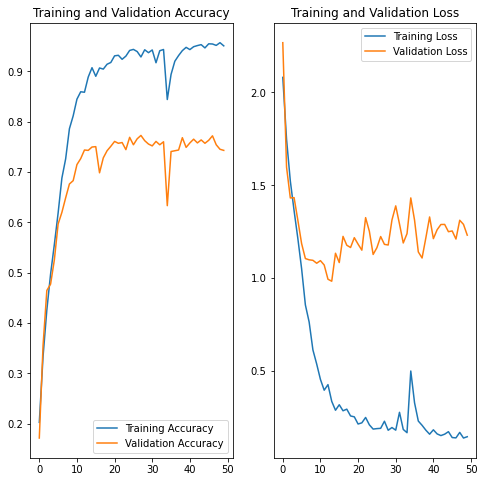

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

**Findings:**
1. Model is still overfitting.
2. Training Accuracy has increased by using Augmentor.
3. The problem of overfitting can be solved by adding dropout layers or add more layer.
4. The Model can be further improved by tuning the hyperparameters
